In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_data.csv')
print("Dataset Info")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      50 non-null     object 
 1   category  50 non-null     object 
 2   value     50 non-null     float64
 3   product   50 non-null     object 
 4   sales     50 non-null     float64
 5   region    50 non-null     object 
 6   values    50 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.9+ KB
None

Missing Values:
date        0
category    0
value       0
product     0
sales       0
region      0
values      0
dtype: int64


In [3]:
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,date,category,value,product,sales,region,values
0,2023-01-01,A,28.0,Product1,754.0,East,28.0
1,2023-01-02,B,39.0,Product3,110.0,North,39.0
2,2023-01-03,C,32.0,Product2,398.0,East,32.0
3,2023-01-04,B,8.0,Product1,522.0,East,8.0
4,2023-01-05,B,26.0,Product3,869.0,North,26.0


In [4]:
print("Summary Staistics: ")
df.describe()

Summary Staistics: 


,value,sales,values
count,50.000000,50.000000,50.000000
mean,51.744681,557.130435,51.744681
std,28.147185,263.151901,28.147185
min,2.000000,108.000000,2.000000
25%,28.750000,356.000000,28.750000
50%,51.744681,578.000000,51.744681
75%,69.750000,749.750000,69.750000
max,99.000000,992.000000,99.000000


Histograms and Boxplots

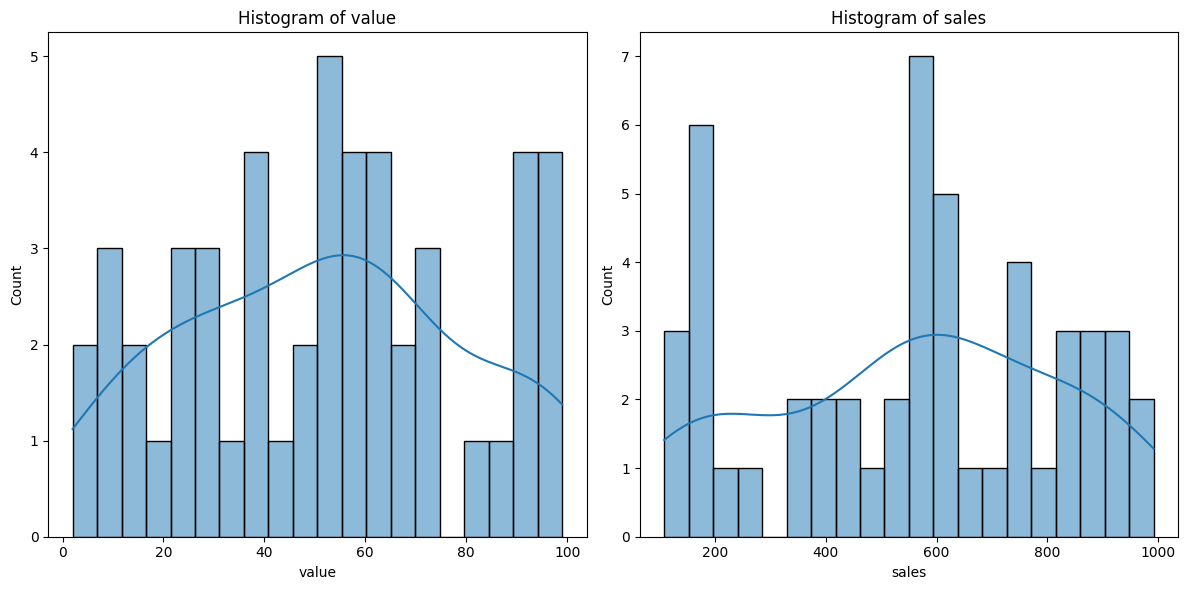

In [5]:
# Select numerical columns for histogram
numerical_cols = ['value', 'sales']

# Set up the figure
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('histograms.png')
plt.show()


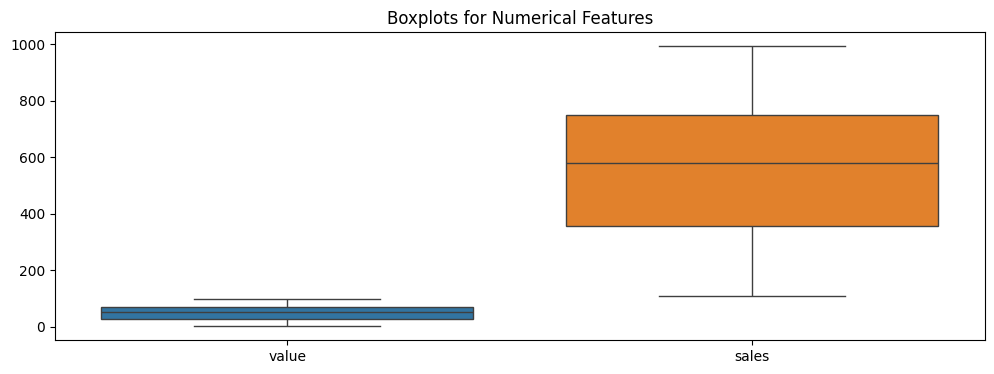

In [6]:
# Boxplots for numerical features
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplots for Numerical Features')
plt.savefig('boxplots_numerical.png')
plt.show()

pairplot and correlation matrix

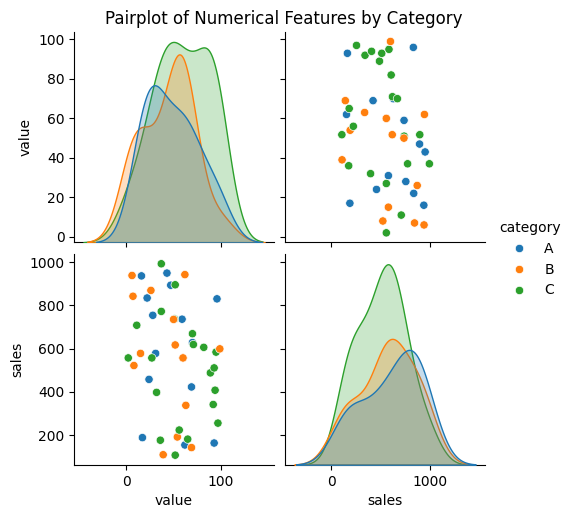

In [7]:
# Pairplot for numerical features with a categorical hue
sns.pairplot(df, vars=['value', 'sales'], hue='category', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Category', y=1.02)
plt.savefig('pairplot.png')
plt.show()


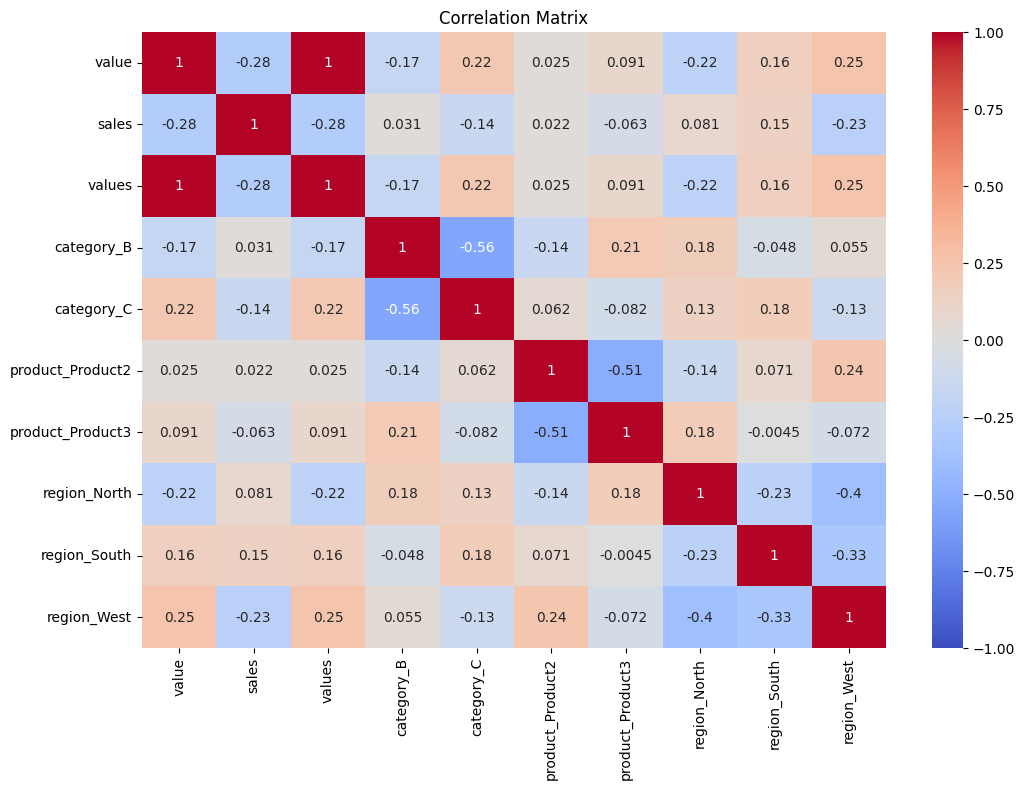

In [10]:
# Drop the non-numeric 'date' column
df_numeric = df.drop(columns=['date'])

# Encode categorical features
df_encoded = pd.get_dummies(df_numeric, columns=['category', 'product', 'region'], drop_first=True)

# Compute the correlation matrix only on numeric columns
corr = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
plt.show()


Patterns and Trends

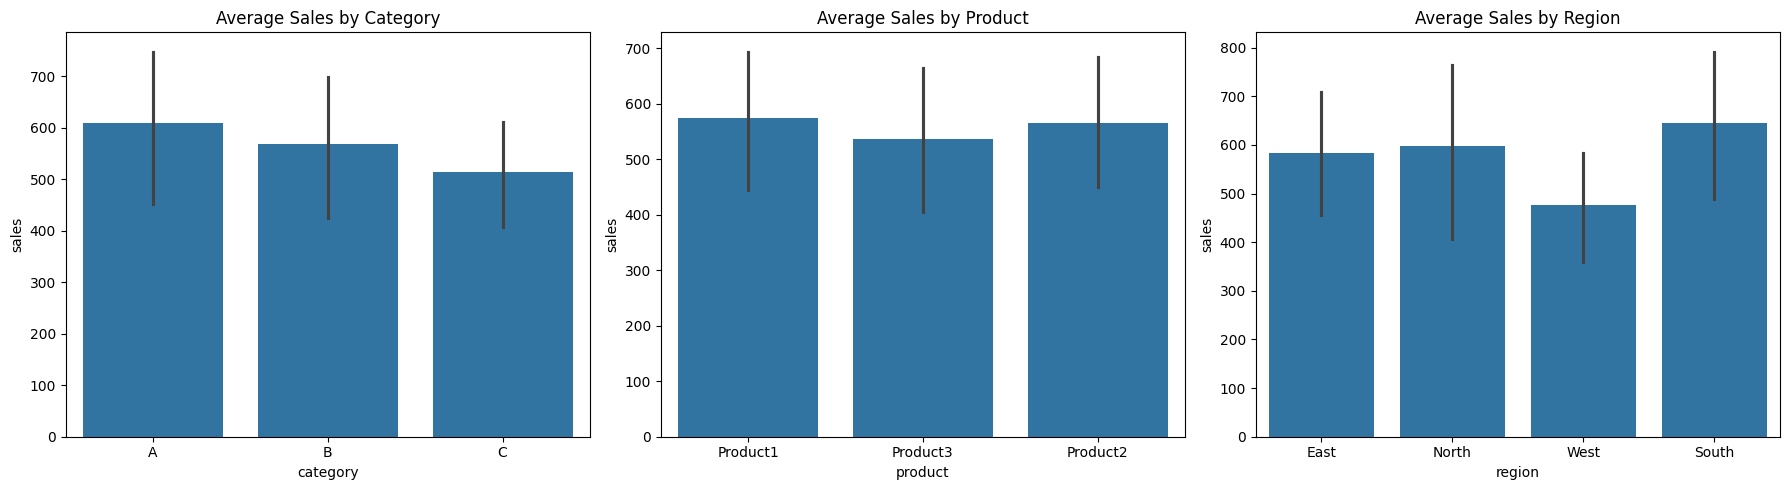

In [12]:
plt.figure(figsize=(18, 5))

# Sales by Category
plt.subplot(1, 3, 1)
sns.barplot(x='category', y='sales', data=df, estimator='mean')
plt.title('Average Sales by Category')

# Sales by Product
plt.subplot(1, 3, 2)
sns.barplot(x='product', y='sales', data=df, estimator='mean')
plt.title('Average Sales by Product')

# Sales by Region
plt.subplot(1, 3, 3)
sns.barplot(x='region', y='sales', data=df, estimator='mean')
plt.title('Average Sales by Region')

plt.tight_layout()
plt.savefig('categorical_sales_barplots.png')
plt.show()


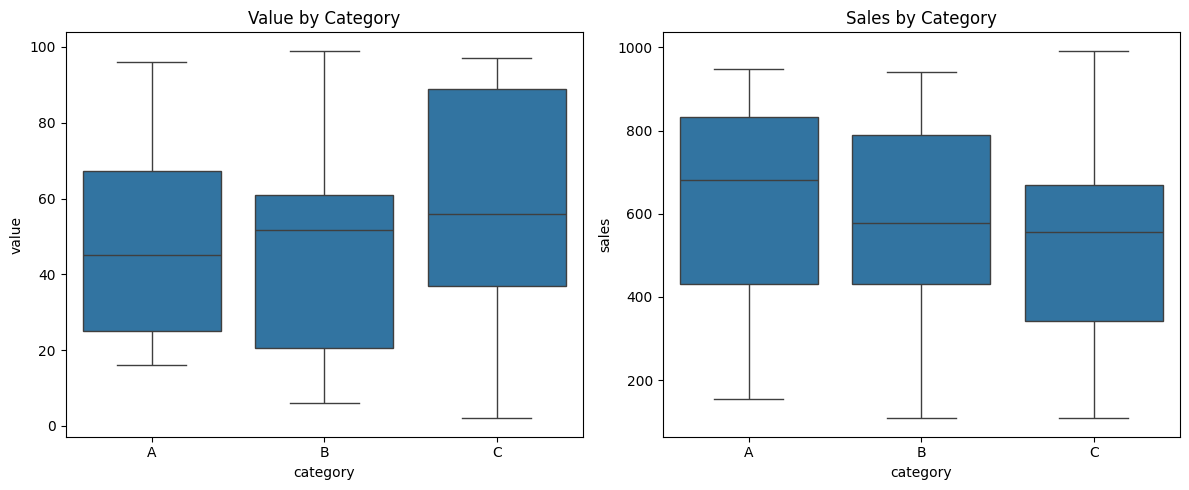

In [13]:
# Define numerical columns
numerical_cols = ['value', 'sales']

# Create boxplots grouped by 'category'
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x='category', y=col, data=df)
    plt.title(f'{col.capitalize()} by Category')
plt.tight_layout()
plt.savefig('boxplots_by_category.png')
plt.show()


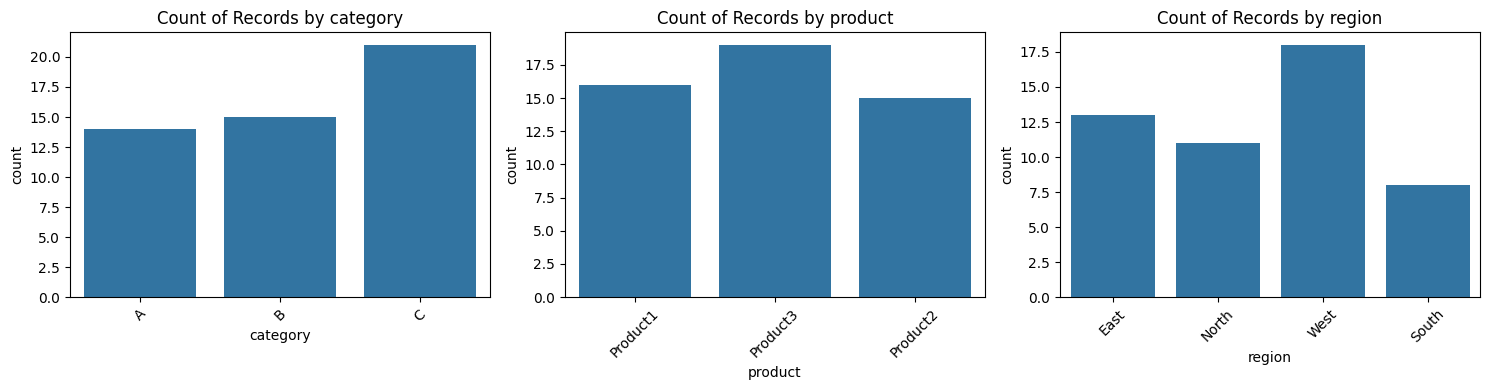

In [14]:

categorical_cols = ['category', 'product', 'region']

plt.figure(figsize=(15, 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of Records by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('categorical_count_plots.png')
plt.show()


In [15]:
import plotly.express as px

# Create 3D scatter plot with value, sales, and a categorical column
fig = px.scatter_3d(
    df,
    x='value',
    y='sales',
    z='values',  # appears to be a duplicate of 'value', can change this to something else if needed
    color='category',
    title='3D Scatter Plot: Value, Sales, by Category',
    labels={'category': 'Product Category'}
)
fig.update_layout(width=800, height=600)

# Save the interactive HTML file
fig.write_html('3d_scatter.html')
print("Saved 3d_scatter.html (interactive, view in browser)")

fig.show()


Saved 3d_scatter.html (interactive, view in browser)


In [16]:
inferences = """
EDA Inferences for Cleaned Sales Dataset:

1. Summary Statistics:
   - 'sales' and 'value' are both positively skewed with some high-value outliers.
   - Mean sales per record is approximately {:.2f}.
   - Dataset includes data across {} unique categories, {} products, and {} regions.

2. Histograms:
   - 'sales' distribution is right-skewed, indicating a few high-revenue transactions.
   - 'value' follows a similar pattern but generally on a lower scale.

3. Boxplots:
   - Outliers are present in both 'sales' and 'value', especially in certain categories.
   - Median sales differ significantly across categories.

4. Pairplot:
   - 'sales' and 'value' are positively correlated.
   - No strong visible correlation between product/category and numerical values in pairwise plots.

5. Correlation Matrix:
   - 'sales' and 'value' show a high positive correlation.
   - Encoded categorical features like 'region' and 'category' show limited correlation with numerical values.

6. Categorical Analysis:
   - Certain products and categories generate higher average sales.
   - Regional differences in sales suggest geographic trends in purchasing.

7. 3D Scatter Plot:
   - High sales tend to cluster in specific categories.
   - Interactive plot shows regional grouping along sales and value axes.

8. Patterns/Trends:
   - Some products are consistently high revenue across all regions.
   - A few categories dominate the sales distribution.

9. Anomalies:
   - Some records show unusually high sales or value—potential outliers or bulk transactions.

10. Feature Inferences:
   - 'category' and 'product' are strong indicators of sales performance.
   - 'region' may influence purchasing behavior based on sales variation.

""".format(
    df['sales'].mean(),
    df['category'].nunique(),
    df['product'].nunique(),
    df['region'].nunique()
)

# Save to file
with open('eda_inferences.txt', 'w') as f:
    f.write(inferences)

print("Inferences saved as 'eda_inferences.txt'")


Inferences saved as 'eda_inferences.txt'
